In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
# df = pd.read_('Project_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df = pd.read_excel('dataset_twitter.xlsx')
df.sample(5)

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/9/screen_name,user_mentions/10/id_str,user_mentions/10/name,user_mentions/10/profile,user_mentions/10/screen_name,user_mentions/11/id_str,user_mentions/11/name,user_mentions/11/profile,user_mentions/11/screen_name,view_count
1928,981267343555796992,2018-04-03T20:29:00.000Z,1,What's the hot topic in this week's @greentech...,energy,Blockchain,power,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2467,906778383681540096,2017-09-10T07:16:28.000Z,1,Aussie start up @PowerLedger_io raises $17m fo...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847,1209286903310123009,2019-12-24T03:07:01.000Z,0,@DoctorKarl Yes. Excess power generated (at lo...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969,976775499920764928,2018-03-22T11:00:01.000Z,1,Project aims to accelerate peer-to-peer energy...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2403,911853511763222528,2017-09-24T07:23:13.000Z,0,RT: PowerLedger_io RT ikechiawazie: With a pee...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()


,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/9/screen_name,user_mentions/10/id_str,user_mentions/10/name,user_mentions/10/profile,user_mentions/10/screen_name,user_mentions/11/id_str,user_mentions/11/name,user_mentions/11/profile,user_mentions/11/screen_name,view_count
0,1641028086035537920,2023-03-29T10:42:40.000Z,0,4) Renewable energy: Blockchain can enable pee...,RenewableEnergy,CleanEnergy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1,1641017690621120512,2023-03-29T10:01:20.000Z,0,Vietnam's first blockchain peer-to-peer energy...,P2P,blockchain,energy,trading,project,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2,1641015320478633985,2023-03-29T09:51:55.000Z,2,#crypto news: Vietnam's first #blockchain peer...,crypto,blockchain,web3,crypto,cryptonews,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
3,1640969402148605953,2023-03-29T06:49:27.000Z,0,Australian energy trading technology company P...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
4,1640961094259974145,2023-03-29T06:18:51.000Z,0,Electricity Central Power Corporation (EVNCPC)...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0


In [5]:
df.columns


Index(['conversation_id', 'created_at', 'favorite_count', 'full_text',
       'hashtags/0', 'hashtags/1', 'hashtags/2', 'hashtags/3', 'hashtags/4',
       'hashtags/5',
       ...
       'user_mentions/9/screen_name', 'user_mentions/10/id_str',
       'user_mentions/10/name', 'user_mentions/10/profile',
       'user_mentions/10/screen_name', 'user_mentions/11/id_str',
       'user_mentions/11/name', 'user_mentions/11/profile',
       'user_mentions/11/screen_name', 'view_count'],
      dtype='object', length=310)

In [6]:
print('length of data is', len(df))


length of data is 2977


In [7]:
df.shape


(2977, 310)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2977 entries, 0 to 2976
Columns: 310 entries, conversation_id to view_count
dtypes: bool(15), float64(63), int64(15), object(217)
memory usage: 6.7+ MB


In [9]:
df.dtypes


conversation_id                   int64
created_at                       object
favorite_count                    int64
full_text                        object
hashtags/0                       object
                                 ...   
user_mentions/11/id_str         float64
user_mentions/11/name            object
user_mentions/11/profile         object
user_mentions/11/screen_name     object
view_count                      float64
Length: 310, dtype: object

In [10]:
np.sum(df.isnull().any(axis=1))


2977

In [11]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   310
Count of rows in the data is:   2977


In [12]:
df['favorite_count'].unique()

array([   0,    2,   23,    1,   64,    7,   11,    6,    5,   10,    8,
          3,    4,    9,   25,   35,  312,   22,   48,   66,  113,   29,
         32,  291,   28,   40,  222,   53,   19,  549,   39,  141,   27,
         51,  127,   12,   15,   17,   24,  180,  212,  105,   21,   30,
         45,   18,   13,  136,  126,   52,   50,   20,   14,   37,   61,
         31,  116,  112,   33,   26,   82,   16,  111,   54,   84,   75,
         60,   71,  142,  109,  129,   56,  135, 1235,   74,   92,   58,
        316,  156,  157,   34])

In [13]:
df['favorite_count'].nunique()


81

ValueError: The number of FixedLocator locations (81), usually from a call to set_ticks, does not match the number of ticklabels (2).

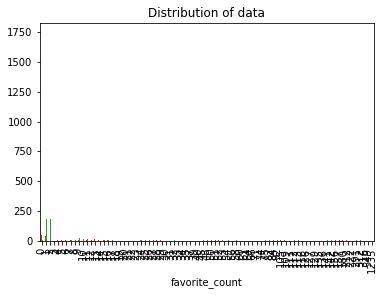

In [14]:
ax = df.groupby('favorite_count').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['full_text']), list(df['favorite_count'])

<AxesSubplot: xlabel='favorite_count', ylabel='count'>

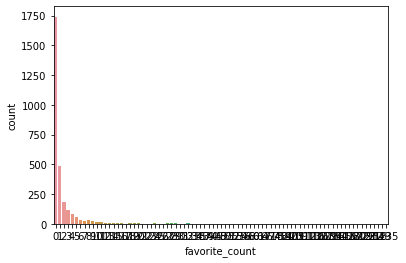

In [15]:
import seaborn as sns
sns.countplot(x='favorite_count', data=df)

In [16]:
data=df[['full_text','favorite_count']]



In [17]:
data['favorite_count'] = data['favorite_count'].replace(4,1)



/tmp/ipykernel_53911/1577548087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['favorite_count'] = data['favorite_count'].replace(4,1)


In [18]:
data['favorite_count'].unique()


array([   0,    2,   23,    1,   64,    7,   11,    6,    5,   10,    8,
          3,    9,   25,   35,  312,   22,   48,   66,  113,   29,   32,
        291,   28,   40,  222,   53,   19,  549,   39,  141,   27,   51,
        127,   12,   15,   17,   24,  180,  212,  105,   21,   30,   45,
         18,   13,  136,  126,   52,   50,   20,   14,   37,   61,   31,
        116,  112,   33,   26,   82,   16,  111,   54,   84,   75,   60,
         71,  142,  109,  129,   56,  135, 1235,   74,   92,   58,  316,
        156,  157,   34])

In [19]:
data_pos = data[data['favorite_count'] == 1]
data_neg = data[data['favorite_count'] == 0]

In [20]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [21]:
dataset = pd.concat([data_pos, data_neg])


In [22]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['full_text'] = dataset['full_text'].apply(lambda text: cleaning_stopwords(text))
dataset['full_text'].head()

11    Australian energy trading technology company @...
17    Renewables-based microgrids peer-to-peer energ...
23    Mekha V - WHAUP - Sertis เปิดตัวบริษัทร่วมทุน ...
25    #Sertis collaboration Mekha V WHA signed joint...
29    I published Increased potential peer-to-peer e...
Name: full_text, dtype: object

In [23]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['full_text']= dataset['full_text'].apply(lambda x: cleaning_punctuations(x))
dataset['full_text'].tail()

2972    sunmangeoff talks peer peer solar energy tradi...
2973    Peer peer solar energy trading – profit first ...
2974    Peer peer solar energy trading – profit first ...
2975    A piece I wrote Peer Peer solar energy trading...
2976    Peertopeer energy trading anyone Check OpenUti...
Name: full_text, dtype: object

In [24]:
dataset['full_text']=dataset['full_text'].str.lower()
dataset['full_text'].tail()

2972    sunmangeoff talks peer peer solar energy tradi...
2973    peer peer solar energy trading – profit first ...
2974    peer peer solar energy trading – profit first ...
2975    a piece i wrote peer peer solar energy trading...
2976    peertopeer energy trading anyone check openuti...
Name: full_text, dtype: object

In [25]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['full_text'] = dataset['full_text'].apply(lambda x: cleaning_repeating_char(x))
dataset['full_text'].tail()

2972    sunmangeoff talks peer peer solar energy tradi...
2973    peer peer solar energy trading – profit first ...
2974    peer peer solar energy trading – profit first ...
2975    a piece i wrote peer peer solar energy trading...
2976    peertopeer energy trading anyone check openuti...
Name: full_text, dtype: object

In [26]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['full_text'] = dataset['full_text'].apply(lambda x: cleaning_URLs(x))
dataset['full_text'].tail()

2972    sunmangeoff talks peer peer solar energy tradi...
2973    peer peer solar energy trading – profit first ...
2974    peer peer solar energy trading – profit first ...
2975    a piece i wrote peer peer solar energy trading...
2976    peertopeer energy trading anyone check openuti...
Name: full_text, dtype: object

In [27]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['full_text'] = dataset['full_text'].apply(lambda x: cleaning_numbers(x))
dataset['full_text'].tail()

2972    sunmangeoff talks peer peer solar energy tradi...
2973    peer peer solar energy trading – profit first ...
2974    peer peer solar energy trading – profit first ...
2975    a piece i wrote peer peer solar energy trading...
2976    peertopeer energy trading anyone check openuti...
Name: full_text, dtype: object

In [28]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['full_text']= dataset['full_text'].apply(lambda x: stemming_on_text(x))
dataset['full_text'].head()

11    australian energy trading technology company p...
17    renewablesbased microgrids peertopeer energy t...
23    mekha v  whaup  sertis เปิดตัวบริษัทร่วมทุน “r...
25    sertis collaboration mekha v wha signed joint ...
29    i published increased potential peertopeer ene...
Name: full_text, dtype: object

In [29]:
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['full_text'] = dataset['full_text'].apply(lambda x: lemmatizer_on_text(x))
dataset['full_text'].head()

[nltk_data] Downloading package wordnet to /home/ifeanyi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


11    australian energy trading technology company p...
17    renewablesbased microgrids peertopeer energy t...
23    mekha v  whaup  sertis เปิดตัวบริษัทร่วมทุน “r...
25    sertis collaboration mekha v wha signed joint ...
29    i published increased potential peertopeer ene...
Name: full_text, dtype: object

In [30]:
X=data.full_text
y=data.favorite_count

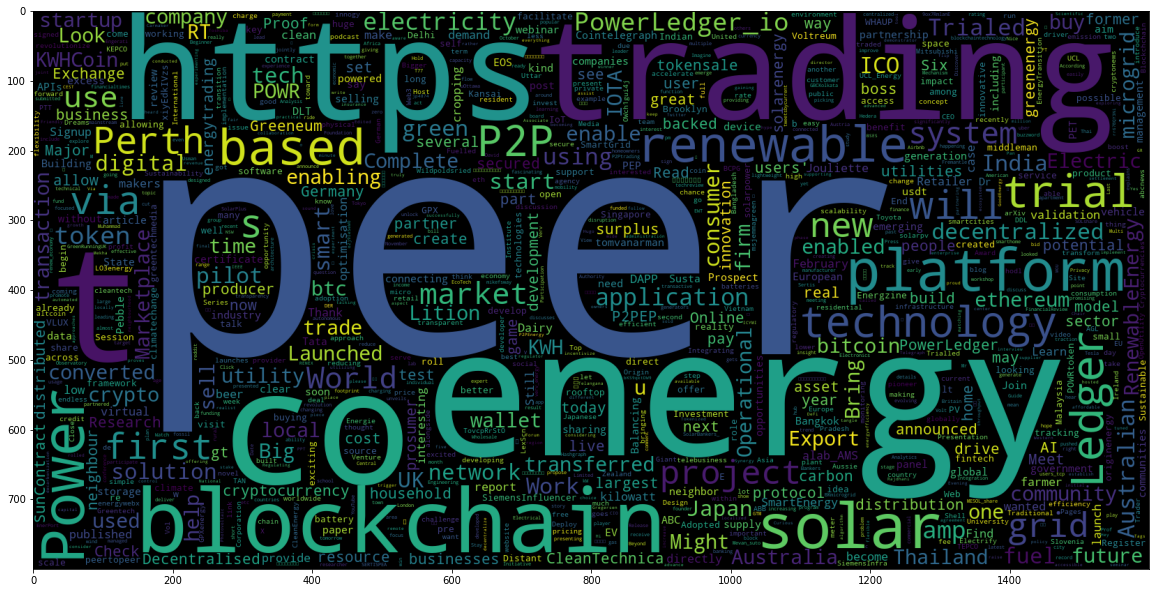

In [60]:
# NEGATIVE WORDS
data_neg = data['full_text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

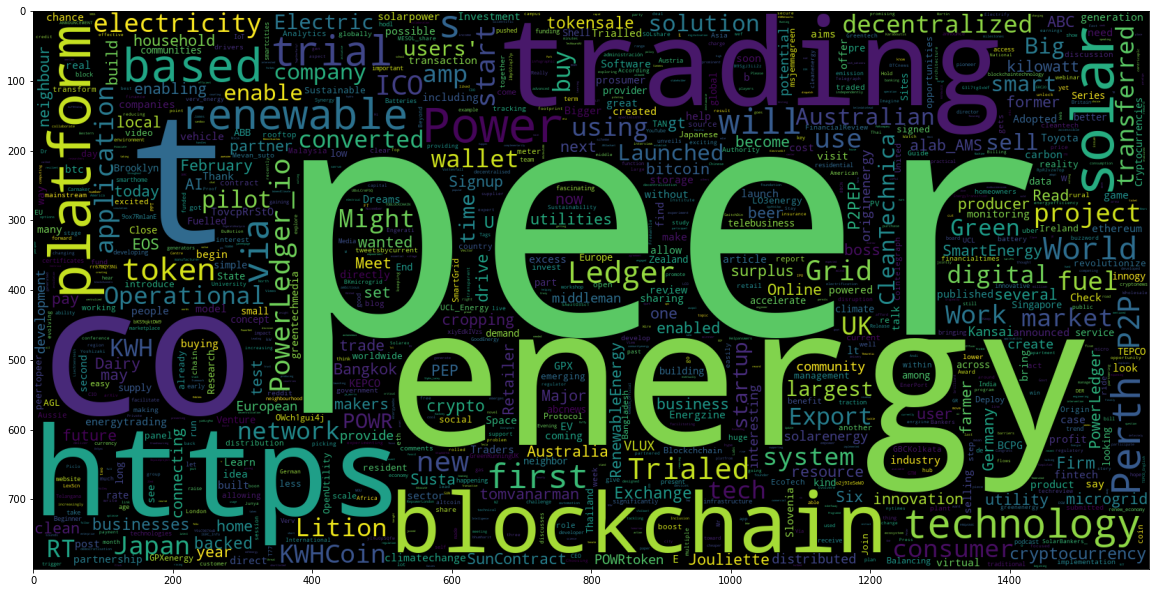

In [73]:
# POSTIVE WORD
data_pos = data['full_text'][1000:]
wc = WordCloud(max_words = 800000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [33]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [34]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  33403


In [35]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [36]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
#     array_2d = np.linspace(1,5,12).reshape(4,3) # create numpy 2D array

    sns.heatmap(cf_matrix, annot = True, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
#     sns.heatmap(corr,annot = True, linewidths=0.2, fmt=".2f")



/home/ifeanyi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ifeanyi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ifeanyi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.99      0.73        85
           1       0.25      0.04      0.06        27
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          33       0.00      0.00      0.00         1
         109       0.00      0.00      0.00         1

    accuracy              

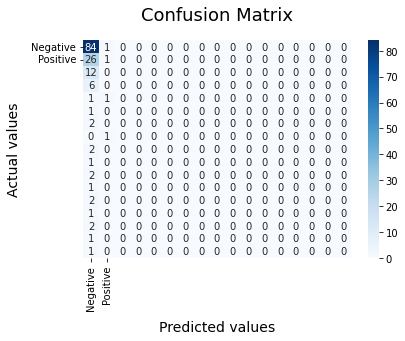

In [37]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

model_Evaluate(BNBmodel)


y_pred1 = BNBmodel.predict(X_test)


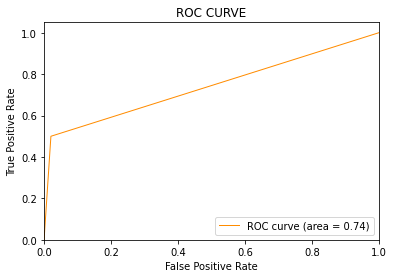

In [55]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=5)

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

/home/ifeanyi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ifeanyi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ifeanyi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.61      0.93      0.73        85
           1       0.17      0.07      0.10        27
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          33       0.00      0.00      0.00         1
         109       0.00      0.00      0.00         1

    accuracy              

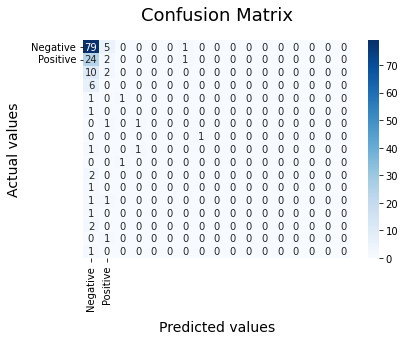

In [74]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

ValueError: multiclass format is not supported

/home/ifeanyi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ifeanyi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ifeanyi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.95      0.72        85
           1       0.25      0.07      0.11        27
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          33       0.00      0.00      0.00         1
         109       0.00      0.00      0.00         1

    accuracy              

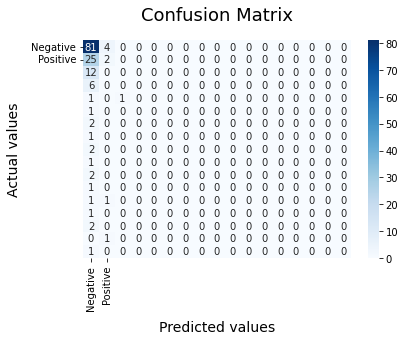

In [76]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

ValueError: multiclass format is not supported